In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDb movies.csv')
temp = df

In [ ]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
#ratings

In [ ]:
df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [ ]:
df1 = df.drop(['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users', 'reviews_from_critics'], axis=1)

In [ ]:
pd.unique(df1['year'])

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [ ]:
df1['year'] = df1['year'].apply(lambda x: 2019 if x=='TV Movie 2019' else int(x))

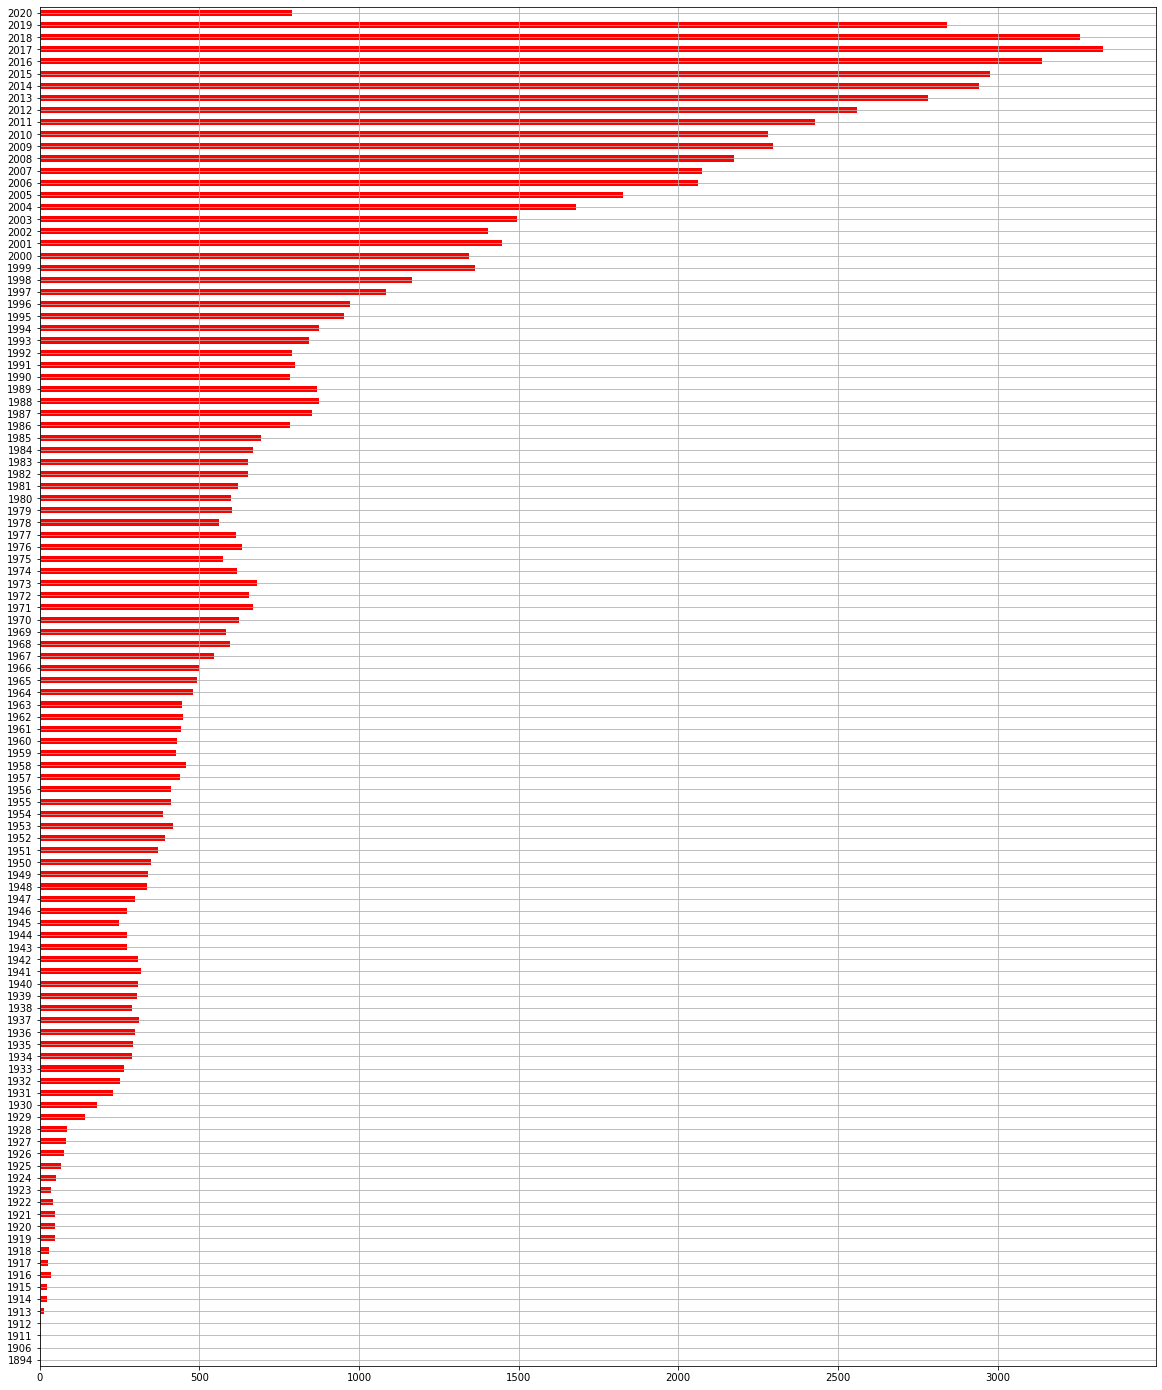

In [ ]:
df1['year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(20,25), color='red')
plt.grid()
plt.show()

In [ ]:
df2 = df1.fillna(' ')

In [ ]:
features = ['genre', 'actors', 'production_company', 'description']#, 'keywords', 'belongs_to_collection']

def combined_feature(row):
    return row['genre']+' '+row['actors']+' '+row['production_company']+' '+row['description']#+' '+row['keywords']+' '+row['belongs_to_collection']

In [ ]:
count = 0
for language in list(pd.unique(df1['language'])):
    if count < 50:
        print(language)
    count = count + 1
len(pd.unique(df1['language']))

None
nan
English
Italian
German
Danish
French
German, English
None, English
Hungarian
Russian
English, German
Spanish
Dutch
Swedish
Swedish, Danish
English, None
Japanese
Latin, French, English
English, French
None, English, French
None, French
English, Greek
English, Yiddish
Sign Languages
English, Spanish
English, Mandarin
Mandarin
None, Russian
Czech
English, Spanish, Italian
English, Polynesian
English, Cantonese, German
English, French, German, Latin
English, Russian
German, English, French
English, Italian, French
Russian, German, French, Yiddish
English, German, French
English, Italian
English, French, Spanish, Arabic, Italian
English, Spanish, French
Vietnamese, French
English, German, Italian
English, Mandarin, French
French, Romanian
German, French
Hindi, Urdu
English, Italian, Swedish
English, French, German


4378

In [ ]:
df2['language'] = df2.language.apply(lambda x: x.split(', ')[0])

In [ ]:
language_stats = df2['language'].value_counts(ascending=False)
language_stats

English     42779
French       5353
Spanish      3423
Italian      3292
Japanese     3168
            ...  
Chechen         1
Tswana          1
Faroese         1
Haida           1
Lingala         1
Name: language, Length: 167, dtype: int64

In [ ]:
small_movie_collections_by_language = language_stats[language_stats<500] 

In [ ]:
df2.language = df2.language.apply(lambda x: 'other' if x in small_movie_collections_by_language else x)
len(df2.language.unique())

27

In [ ]:
df2 = df2[(df2['language']!='other')]
df2.shape

(80033, 16)

In [ ]:
df2['New_genre'] = df2.genre.apply(lambda x: str([(i+' ')*((3)-re.findall('[A-z]+', x).index(i)) for i in re.findall('[A-z]+', x)])[1:-1])
df2.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,New_genre
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,'Drama Drama Drama '
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,"'Drama Drama Drama ', 'History History '"
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,"'Adventure Adventure Adventure ', 'Drama Drama..."
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,"'Biography Biography Biography ', 'Drama Drama '"
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,753,"'Biography Biography Biography ', 'Drama Drama..."


In [ ]:
#df3 = df2.iloc[17172:34350, :]
df3 = df2.drop_duplicates(subset=['original_title'], keep='last')
df3.reset_index(inplace=True)
df3.shape

(75340, 18)

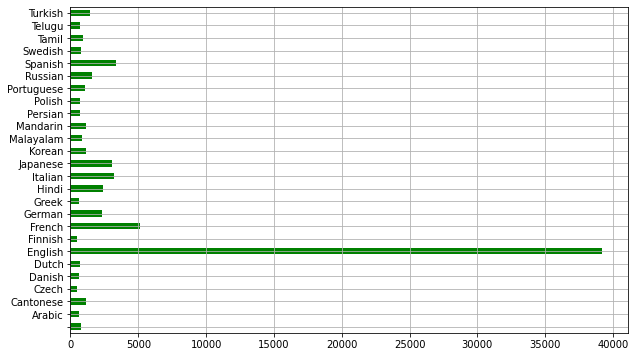

In [ ]:
df3['language'].value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(10,6), color='green')
plt.grid()
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def recommendations(title, df3= df3):
    
    lang = df3[(df3['original_title']==title)]['language'].iloc[0]
    
    if lang != 'English':
        data = df3[(df3['language']==lang)]
    else:
        data = df3[(df3['language']==lang)]
        data = data[(df3['votes']>500)]

    def combined_feature(row):
        return row['genre']+' '+row['actors']+' '+row['description']+' '+row['actors']+' '+row['description']
    
    data['combined_features'] = data.apply(combined_feature, axis=1)
    data['combined_features'] = data['combined_features'].apply(lambda x: ' '.join([w.lower() for w in x.split(' ')]))

    import nltk
    from nltk.corpus import stopwords
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    if lang != 'English': data = data 
    else: data = data[(data['votes']>500)]

    stopset = set(stopwords.words('english'))
    vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(2, 2),min_df=0, strip_accents='ascii', stop_words=stopset)
    vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)
    count_matrix = vectorizer.fit_transform(data.combined_features)
    cosine_sim = cosine_similarity(count_matrix)

    def weighted_rating(x):
        v = x['votes']
        R = x['avg_vote']
        return (v/(v+m) * R) + (m/(m+v) * C)

    data.reset_index(inplace=True)
    indices = pd.Series(data.index, index = data['original_title']).drop_duplicates()

    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores.sort(key=lambda x: x[1], reverse= True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = data.iloc[movie_indices][['title', 'votes', 'avg_vote', 'year', 'genre', 'language']]
    vote_counts = movies[movies['votes'].notnull()]['votes'].astype('int')
    vote_averages = movies[movies['avg_vote'].notnull()]['avg_vote']#.astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)

    qualified = movies[(movies['votes'] >= m) & (movies['votes'].notnull()) & (movies['avg_vote'].notnull())]
    qualified['votes'] = qualified['votes'].astype('int')
    qualified['avg_vote'] = qualified['avg_vote']#.astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)

    del cosine_sim

    return qualified

recommendations('Iron Man')

,title,votes,avg_vote,year,genre,language,wr
13994,The Avengers,1241220,8.0,2012,"Action, Adventure, Sci-Fi",English,7.782376
19289,Captain America: Civil War,644241,7.8,2016,"Action, Adventure, Sci-Fi",English,7.481101
17838,Spider-Man: Homecoming,494060,7.4,2017,"Action, Adventure, Sci-Fi",English,7.134676
18144,Avengers: Age of Ultron,722685,7.3,2015,"Action, Adventure, Sci-Fi",English,7.122291
15447,Iron Man 3,739816,7.2,2013,"Action, Adventure, Sci-Fi",English,7.047971
15199,Iron Man 2,706284,7.0,2010,"Action, Adventure, Sci-Fi",English,6.889052
19574,Solo: A Star Wars Story,278319,6.9,2018,"Action, Adventure, Sci-Fi",English,6.736278
15128,Escape Plan - Fuga dall'inferno,223688,6.7,2013,"Action, Thriller",English,6.613813
16079,Elysium,413841,6.6,2013,"Action, Drama, Sci-Fi",English,6.574043
16418,Il dittatore,268038,6.4,2012,Comedy,English,6.455143
